## Importing Python Libraries

In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np 

from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
# Create DataFrames
galaxyProperties = pd.read_csv("GalaxyProperties.csv")
spectra = pd.read_csv("spectra.csv")
wavelengths = pd.read_csv("wavelengths.csv")

## Visualizing Spectra

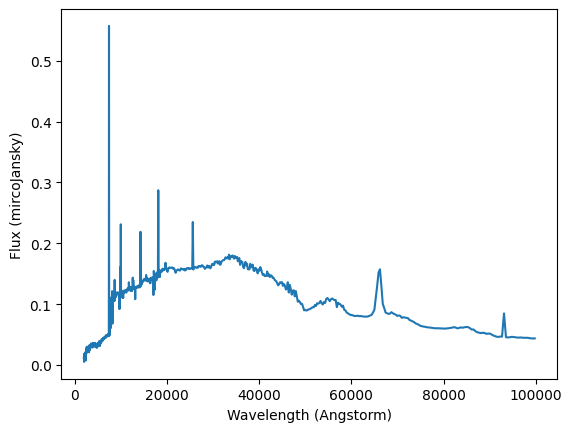

In [3]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[0].values[0].split(" ")])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

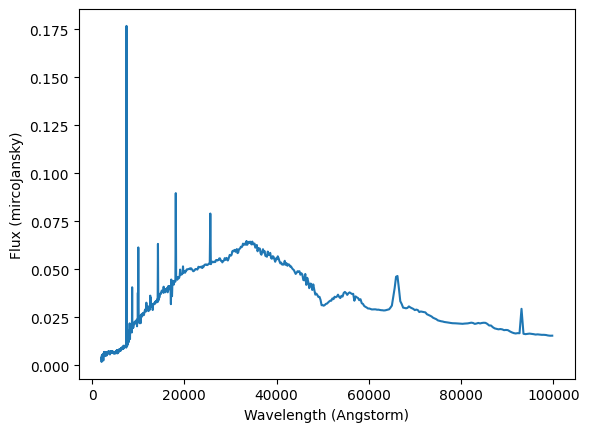

In [4]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[1].values[0].split(" ")])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

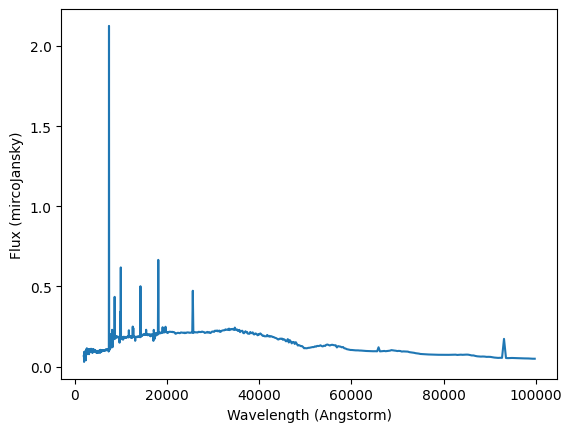

In [5]:
plt.plot(wavelengths, [float(x) for x in spectra.iloc[2].values[0].split(" ")])
plt.ylabel("Flux (mircoJansky)")
plt.xlabel("Wavelength (Angstorm)")
plt.show()

## Data Preprocessing

In [1]:
#Selecting Targets
age_values = galaxyProperties['Age (Gyr)'].values
tau_values = galaxyProperties['Tau (Gyr)'].values
stellarMass_values = galaxyProperties['Log10(Mass/Mass_Sun)'].values
dust_values = galaxyProperties['Dust attenuation value'].values


NameError: name 'galaxyProperties' is not defined

In [7]:
#Converting Spectra Data Into 850 Features
m = []
c = []

m.append(spectra.columns.values[0].split(" "))
for i in range(len(spectra)):
    m.append(spectra.loc[i][0].split(" "))
for i in range(850):
    c.append(f"feature_{1+i}")
 
spectra =  pd.DataFrame(m, columns=c)
X = spectra.values
spectra.shape

(1000, 850)

## Selecting Model: KNN Regressor

## Creating Machine Learning Model

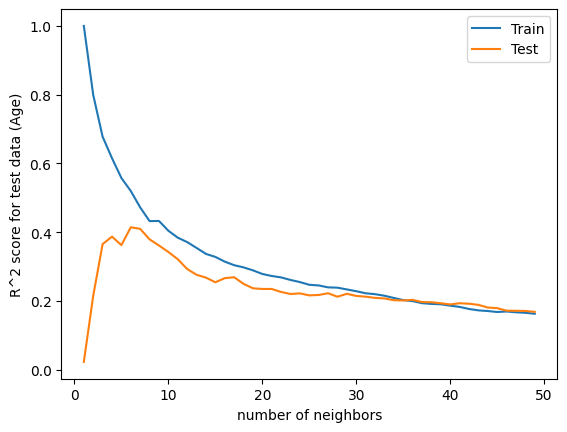

In [8]:
#Finding the best n_neighbors for KNN for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [9]:
#Training KNN model for age_values
X_train, X_test, y_train, y_test = train_test_split(X, age_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=6)
cv_scores = cross_validate(knn, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.5197269126032493 

Test Score:  0.41420231357970727 

r2 mean cross validate score: 0.31215374093261283 

neg_mean_squared_error mean cross validate score: -0.4631124915606247 

neg_root_mean_squared_error mean cross validate score: -0.6788662467403593 

neg_mean_absolute_error mean cross validate score: -0.44893785679903325 



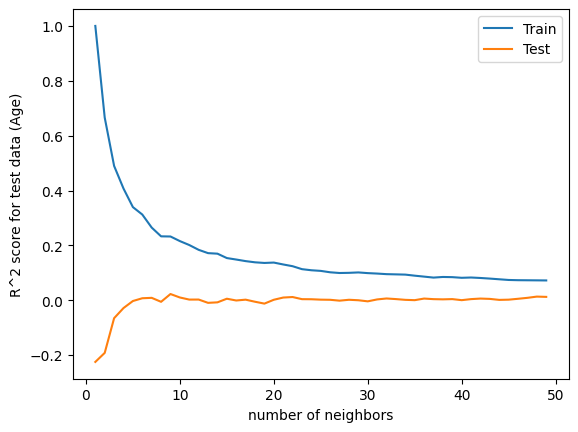

In [10]:
#Finding the best n_neighbors for KNN for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [11]:
#Training KNN model for tau_values
X_train, X_test, y_train, y_test = train_test_split(X, tau_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=9)
cv_scores = cross_validate(knn, X, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.23243280859679238 

Test Score:  0.022689013490138743 

r2 mean cross validate score: 0.28136054397470883 

neg_mean_squared_error mean cross validate score: -0.48314978863228986 

neg_root_mean_squared_error mean cross validate score: -0.6941169561480396 

neg_mean_absolute_error mean cross validate score: -0.4649936286212714 



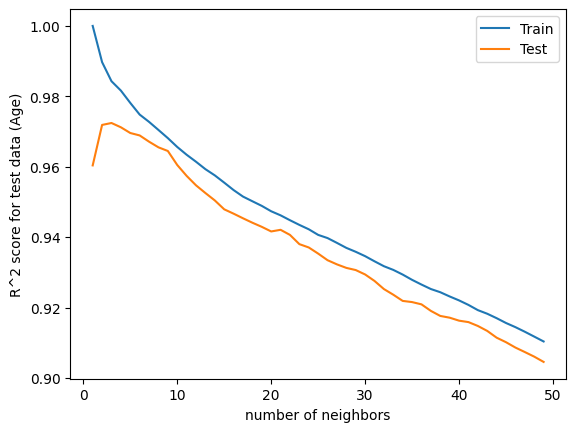

In [12]:
#Finding the best n_neighbors for KNN for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [13]:
#Training KNN model for stellarMass_values
X_train, X_test, y_train, y_test = train_test_split(X, stellarMass_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.9842882044740907 

Test Score:  0.9724207903540447 

r2 mean cross validate score: 0.968390769603652 

neg_mean_squared_error mean cross validate score: -0.016447259353576864 

neg_root_mean_squared_error mean cross validate score: -0.1279022989682964 

neg_mean_absolute_error mean cross validate score: -0.09211693453101126 



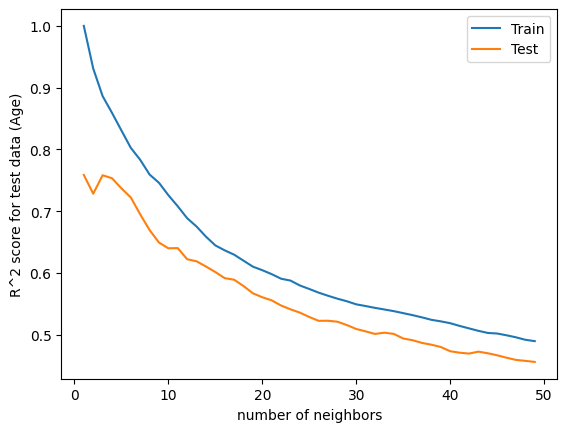

In [14]:
#Finding the best n_neighbors for KNN for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [15]:
#Training KNN model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X, dust_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.8863427127279826 

Test Score:  0.7581213891407615 

r2 mean cross validate score: 0.7568358079295379 

neg_mean_squared_error mean cross validate score: -0.02999149577740014 

neg_root_mean_squared_error mean cross validate score: -0.17140373179619475 

neg_mean_absolute_error mean cross validate score: -0.08952926874679343 



### First Model Conclusions

Age Model - 0.31

Tau Model - 0.28

Stellar Mass Model - 0.96

Dust Model - 0.75

## Reducing Features 

In [103]:
# Finding important features for age model
features = spectra.columns
lasso = Lasso(alpha=0.01)
lasso.fit(X,age_values)

age_lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

age_lasso_coef_df[age_lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10)

,feature,coef
0,feature_555,0.016677
1,feature_605,0.013667
2,feature_614,0.011641
3,feature_597,0.011356
4,feature_602,0.003524
5,feature_612,0.002443


In [104]:
# Selecting important features for age model
threshold = 0.01
not_important_features = age_lasso_coef_df[(age_lasso_coef_df['coef'] > -threshold) & (age_lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
print(f"{len(spectra.columns) - len(list(not_important_features))} features remain")

6 features remain


In [105]:
#Creating a matrix to reference the reduced features for age model
X_reduced_age  = spectra.drop(not_important_features, axis=1).values

In [52]:
# Finding important features for tau model
features = spectra.columns
lasso = Lasso(alpha=0.001)
lasso.fit(X,tau_values)

tau_lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

tau_lasso_coef_df[tau_lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.482e+02, tolerance: 2.042e-01
  model = cd_fast.enet_coordinate_descent(


,feature,coef
0,feature_6,1.155917
1,feature_287,0.117967
2,feature_328,0.089597
3,feature_481,0.076752
4,feature_429,0.075548
5,feature_431,0.061143
6,feature_333,0.055362
7,feature_357,0.052817
8,feature_758,0.052045
9,feature_352,0.048382


In [53]:
# Selecting important features for tau model
threshold = 0.01
not_important_features = tau_lasso_coef_df[(tau_lasso_coef_df['coef'] > -threshold) & (tau_lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
print(f"{len(spectra.columns) - len(list(not_important_features))} features remain")

48 features remain


In [54]:
#Creating a matrix to reference the reduced features for tau model
X_reduced_tau  = spectra.drop(not_important_features, axis=1).values

In [67]:
# Finding important features for stellar mass model
features = spectra.columns
lasso = Lasso(alpha=0.01)
lasso.fit(X,stellarMass_values)

stellarMass_lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

#top 30 most import features
stellarMass_lasso_coef_df[stellarMass_lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.506e-01, tolerance: 5.223e-02
  model = cd_fast.enet_coordinate_descent(


,feature,coef
0,feature_314,0.265571
1,feature_313,0.101350
2,feature_689,0.022806
3,feature_686,0.022525
4,feature_685,0.015618
5,feature_683,0.011874
6,feature_287,0.006421


In [68]:
# Selecting important features for stellar mass model
threshold = 0.01
not_important_features = stellarMass_lasso_coef_df[(stellarMass_lasso_coef_df['coef'] > -threshold) & (age_lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
print(f"{len(spectra.columns) - len(list(not_important_features))} features remain")

43 features remain


In [69]:
#Creating a matrix to reference the reduced features for stellar mass model
X_reduced_stellarMass  = spectra.drop(not_important_features, axis=1).values

In [98]:
# Finding important features for dust model
features = spectra.columns
lasso = Lasso(alpha=0.001)
lasso.fit(X,dust_values)

dust_lasso_coef_df = pd.DataFrame({'feature': features , 'coef': lasso.coef_})

dust_lasso_coef_df[dust_lasso_coef_df['coef'] > 0].sort_values('coef', ascending=False).reset_index(drop=True).head(10)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e+01, tolerance: 1.248e-02
  model = cd_fast.enet_coordinate_descent(


,feature,coef
0,feature_299,0.323247
1,feature_428,0.102217
2,feature_298,0.085186
3,feature_480,0.053829
4,feature_686,0.027690
5,feature_765,0.025337
6,feature_699,0.021474
7,feature_681,0.021474
8,feature_684,0.018664
9,feature_523,0.018390


In [99]:
# Selecting important features for dust model
threshold = 0.01
not_important_features = dust_lasso_coef_df[(dust_lasso_coef_df['coef'] > -threshold) & (dust_lasso_coef_df['coef'] < threshold)]['feature'].values

#number of important features based on threshold var
print(f"{len(spectra.columns) - len(list(not_important_features))} features remain")

37 features remain


In [100]:
#Creating a matrix to reference the reduced features for age model
X_reduced_dust  = spectra.drop(not_important_features, axis=1).values

## Creating Second Machine Learning Model

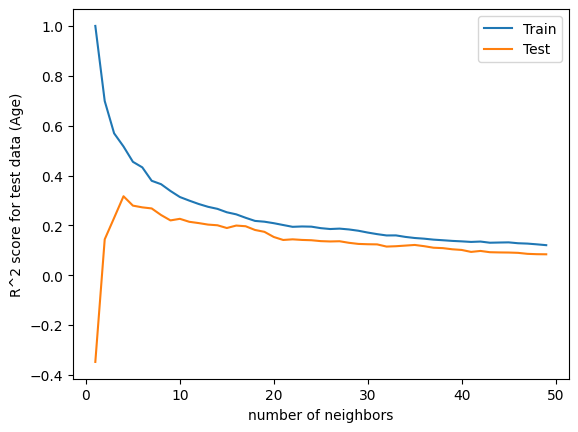

In [50]:
#Finding the best n_neighbors for KNN for age_values with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_age, age_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [51]:
#Training KNN model for age_values with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_age, age_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=10)
cv_scores = cross_validate(knn, X_reduced_age, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.3137407544959032 

Test Score:  0.2262828213397967 

r2 mean cross validate score: 0.1558540279404716 

neg_mean_squared_error mean cross validate score: -0.5663873773970941 

neg_root_mean_squared_error mean cross validate score: -0.751914884571051 

neg_mean_absolute_error mean cross validate score: -0.510669356571817 



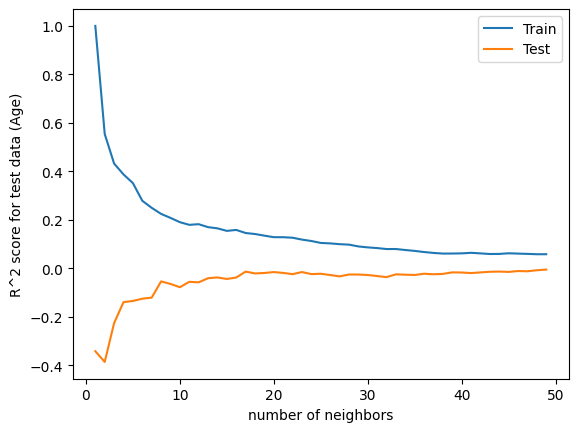

In [61]:
#Finding the best n_neighbors for KNN for tau_values with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_tau, tau_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [62]:
#Training KNN model for tau_values with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_tau, tau_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=9)
cv_scores = cross_validate(knn, X_reduced_tau, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.20847575683598818 

Test Score:  -0.06388627160479743 

r2 mean cross validate score: 0.19249278091160038 

neg_mean_squared_error mean cross validate score: -0.5425368137306721 

neg_root_mean_squared_error mean cross validate score: -0.7357372143129499 

neg_mean_absolute_error mean cross validate score: -0.5010973753661221 



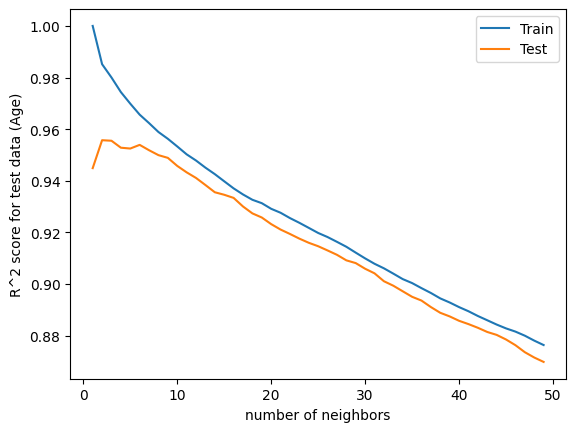

In [63]:
#Finding the best n_neighbors for KNN for stellarMass_values with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_stellarMass, stellarMass_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [64]:
#Training KNN model for stellarMass_values with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_stellarMass, stellarMass_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X_reduced_stellarMass, stellarMass_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.9800079206304737 

Test Score:  0.9555011923406482 

r2 mean cross validate score: 0.9536695996140816 

neg_mean_squared_error mean cross validate score: -0.023986196606776894 

neg_root_mean_squared_error mean cross validate score: -0.154785518754711 

neg_mean_absolute_error mean cross validate score: -0.11348209752749328 



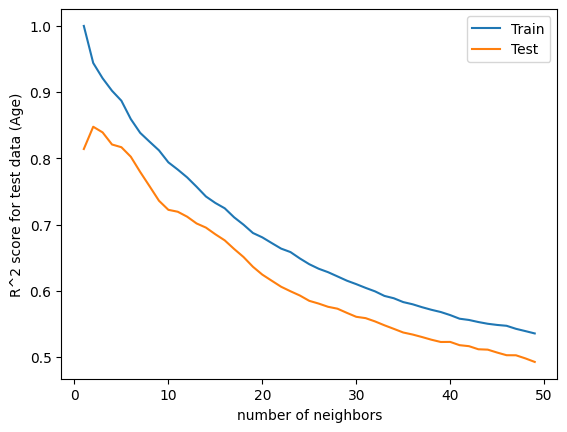

In [65]:
#Finding the best n_neighbors for KNN for dust_values with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_dust, dust_values, test_size=0.2, random_state=42)
values1 = []
values2 = []
for n in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    values1.append(knn.score(X_train, y_train))
    values2.append(knn.score(X_test, y_test))

plt.plot(range(1,50), values1, label='Train')
plt.plot(range(1,50), values2, label='Test')
plt.xlabel("number of neighbors")
plt.ylabel("R^2 score for test data (Age)")
plt.legend()
plt.show()

In [101]:
#Training KNN model for dust_values
X_train, X_test, y_train, y_test = train_test_split(X_reduced_dust, dust_values, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print("Train Score: ",knn.score(X_train, y_train),"\n")
print("Test Score: ",knn.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_validate(knn, X_reduced_dust, dust_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.9209084200632873 

Test Score:  0.839143500116415 

r2 mean cross validate score: 0.8327664370755501 

neg_mean_squared_error mean cross validate score: -0.020590675934511325 

neg_root_mean_squared_error mean cross validate score: -0.14195693402069282 

neg_mean_absolute_error mean cross validate score: -0.06723182049421404 



### Second Model Conclusions
Age Model - 0.15 with lasso with alpha = 0.001

Tau Model - 0.19 with lasso with alpha = 0.001

Stellar Mass Model - 0.967 with lasso with alpha = 0.01

Dust Model - 0.832 with lasso with alpha = 0.001

## Creating Different Models

In [111]:
#Training Linear Regression model for age with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_age, age_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X_reduced_age, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.049485970913569766 

Test Score:  0.030061416639795335 

r2 mean cross validate score: 0.00896635608803915 

neg_mean_squared_error mean cross validate score: -0.6648989505282109 

neg_root_mean_squared_error mean cross validate score: -0.8150071430708066 

neg_mean_absolute_error mean cross validate score: -0.5608153143126197 



In [110]:
#Training Decision Tree Regression model for age with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_age, age_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print("Train Score: ",dt.score(X_train, y_train),"\n")
print("Test Score: ",dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor()
cv_scores = cross_validate(dt, X_reduced_age, age_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  1.0 

Test Score:  -0.4736031709475179 

r2 mean cross validate score: -0.5736182969834844 

neg_mean_squared_error mean cross validate score: -1.0517609672338528 

neg_root_mean_squared_error mean cross validate score: -1.0254073743797552 

neg_mean_absolute_error mean cross validate score: -0.6464343335941471 



In [112]:
#Training Linear Regression model for tau with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_tau, tau_values, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train Score: ",reg.score(X_train, y_train),"\n")
print("Test Score: ",reg.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
reg = LinearRegression()
cv_scores = cross_validate(reg, X_reduced_tau, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  0.03882236135635231 

Test Score:  -2.7848013171632946 

r2 mean cross validate score: -2.376218715846909 

neg_mean_squared_error mean cross validate score: -6.84994650303899 

neg_root_mean_squared_error mean cross validate score: -2.5430544655820584 

neg_mean_absolute_error mean cross validate score: -0.9292303811544844 



In [113]:
#Training Decision Tree Regression model for tau with reduced features
X_train, X_test, y_train, y_test = train_test_split(X_reduced_tau, tau_values, test_size=0.2, random_state=42)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
print("Train Score: ",dt.score(X_train, y_train),"\n")
print("Test Score: ",dt.score(X_test, y_test),"\n")
tests = ['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor()
cv_scores = cross_validate(dt, X_reduced_tau, tau_values,cv=kf, scoring=('r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_error'))
for test in tests:
    print(test+f" mean cross validate score: {np.mean(cv_scores['test_' + test])} \n")

Train Score:  1.0 

Test Score:  -0.9361827760741241 

r2 mean cross validate score: -0.6549694072318804 

neg_mean_squared_error mean cross validate score: -3.314082100374121 

neg_root_mean_squared_error mean cross validate score: -1.7971861907915432 

neg_mean_absolute_error mean cross validate score: -0.7326342867935869 



### Different Model Conclusion
- Age Model 0.00 with Linear with lasso with alpha = 0.001
- Tau Model -0.654 with Decision with lasso with alpha = 0.001